In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data/train',
    seed=123,
    image_size=(180, 80),
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data/val',
    seed=123,
    image_size=(180, 80),
    batch_size=32)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data/test',
    image_size=(180, 80),
    batch_size=32)

Found 1800 files belonging to 6 classes.
Found 600 files belonging to 6 classes.
Found 600 files belonging to 6 classes.


In [3]:
class_names = train_ds.class_names
print(class_names)

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5']


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Layer 1: Conv2D (7x7, 32 filters)
model.add(layers.Conv2D(32, (7, 7), input_shape=(180,80,3)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Layer 2: MaxPooling2D (3x3, stride 2)
model.add(layers.MaxPooling2D((3, 3), strides=2))

# Layer 3: Conv2D (5x5, 64 filters)
model.add(layers.Conv2D(64, (5, 5)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Layer 4: MaxPooling2D (5x5, stride 2)
model.add(layers.MaxPooling2D((5, 5), strides=2))

# Layer 5: Conv2D (7x7, 128 filters)
model.add(layers.Conv2D(128, (7, 7)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Layer 6: MaxPooling2D (7x7, stride 2)
model.add(layers.MaxPooling2D((7, 7), strides=2))

# Layer 7: Dropout
model.add(layers.Dropout(0.5))

# Layer 8: Flatten and Dense (Linear layer)
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))



In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 174, 74, 32)       4736      
                                                                 
 batch_normalization (Batch  (None, 174, 74, 32)       128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 174, 74, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 86, 36, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 32, 64)        51264     
                                                                 
 batch_normalization_1 (Bat  (None, 82, 32, 64)        2

In [9]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 410s 2s/step - loss: 1.3202 - accuracy: 0.5700 - val_loss: 4.4916 - val_accuracy: 0.3717
Epoch 2/100
57/57 [==============================] - 2s 33ms/step - loss: 0.9921 - accuracy: 0.6511 - val_loss: 1.5668 - val_accuracy: 0.5283
Epoch 3/100
57/57 [==============================] - 2s 33ms/step - loss: 0.8946 - accuracy: 0.6778 - val_loss: 2.9145 - val_accuracy: 0.4517
Epoch 4/100
57/57 [==============================] - 2s 33ms/step - loss: 0.8051 - accuracy: 0.7028 - val_loss: 1.4296 - val_accuracy: 0.5650
Epoch 5/100
57/57 [==============================] - 2s 36ms/step - loss: 0.7992 - accuracy: 0.7089 - val_loss: 1.3546 - val_accuracy: 0.6700
Epoch 6/100
57/57 [==============================] - 2s 35ms/step - loss: 0.6781 - accuracy: 0.7417 - val_loss: 0.9168 - val_accuracy: 0.7017
Epoch 7/100
57/57 [==============================] - 2s 33ms/step - loss: 0.6379 - accuracy: 0.7650 - val_loss: 0.8218 - val_accuracy: 0.7517
Epoch 8/100
57/57 

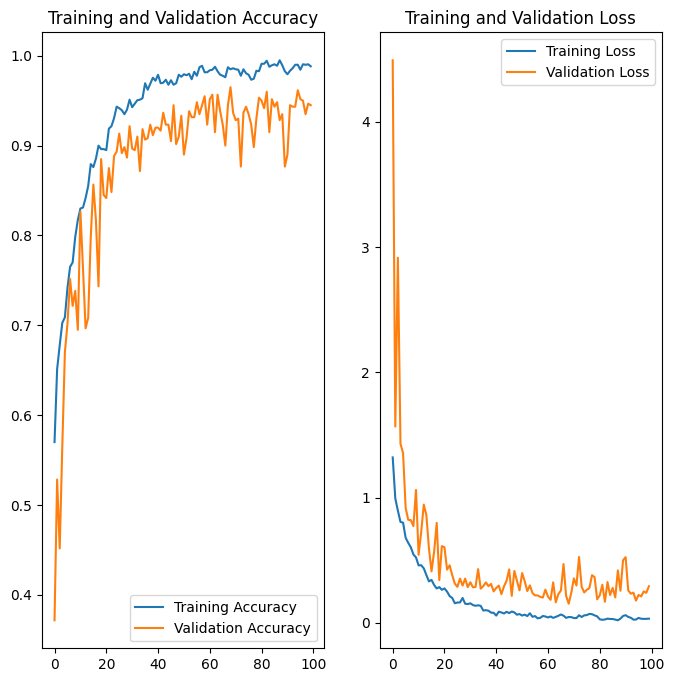

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')

19/19 [==============================] - 115s 3s/step - loss: 0.3201 - accuracy: 0.9400
Test accuracy: 0.9399999976158142


In [12]:
model.save('/content/drive/MyDrive/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 163ms/step


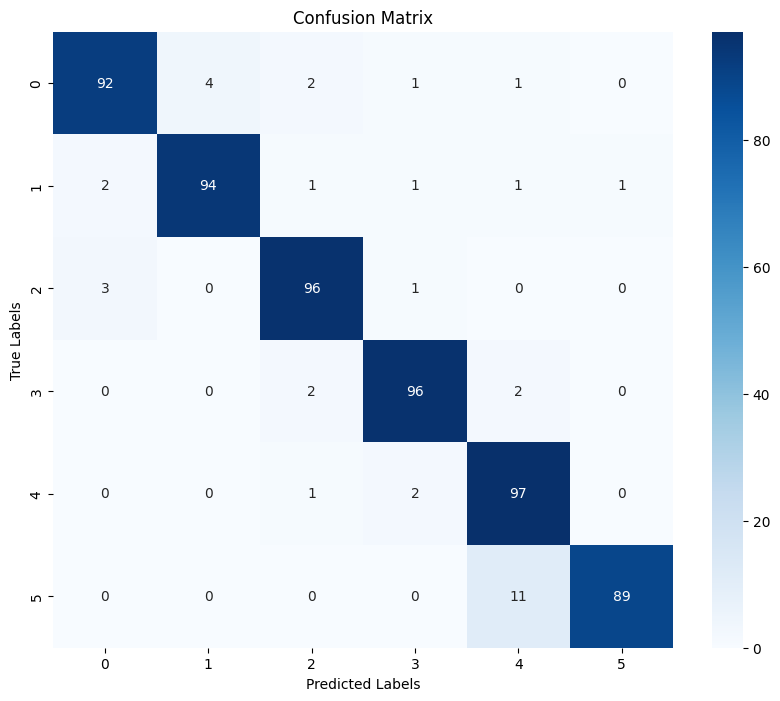

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset creation, model definition, and training code here

# Predicting on the test dataset
test_labels = []
test_predictions = []

for images, labels in test_ds:
    preds = model.predict(images)
    test_predictions.extend(np.argmax(preds, axis=1))
    test_labels.extend(labels.numpy())

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
